In [1]:
import os
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from dog_images import DogImages
from image_classifier import ImageClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
picsize = 128
# Step 1: Get List of Dogs
lst = [x[0] for x in os.walk('../Images')]
lst_dogs = [a.replace('../Images/', '') for a in lst[1:]]
print(lst_dogs[0])

n02097474-Tibetan_terrier


In [3]:
# Step 2: Make the Images...
dog_images = DogImages(lst_dogs, picsize)
# dog_images.generate_img_files()
train_imgs = dog_images.load_images('train')
test_imgs = dog_images.load_images('test')
Xtest = test_imgs[0]
Ytest = test_imgs[1]
Xtrain = train_imgs[0]
Ytrain = train_imgs[1]
print(lst_dogs[-1])

n02096177-cairn


In [4]:
# Step 3: Initial Shuffle of Train & Test Sets
Xhold = Xtrain.copy()
Yhold = Ytrain.copy()
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtrain[i, :] = Xhold[n, :]
    Ytrain[i, :] = Yhold[n, :]

Xhold = Xtest
Yhold = Ytest
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtest[i, :] = Xhold[n, :]
    Ytest[i, :] = Yhold[n, :]
print('done')

done


In [5]:
def plot_learning(model):
    plt.plot(list(range(len(model.loss_function))),
             model.loss_function, color='y', label='Loss/Max Loss')
    plt.plot(list(range(len(model.train_accuracies))),
             (1/len(model.classes))*np.ones(len(model.train_accuracies)),
             linestyle='-', label='chance')
    plt.plot(list(range(len(model.train_accuracies))),
             model.train_accuracies, color='r', label='Training')
    plt.plot(list(range(len(model.val_accuracies))),
             model.val_accuracies, color='b', label='Validation')
    plt.ylabel('Probability')
    plt.xlabel('Epochs')
    plt.title('Accuracy & Loss')
    plt.ylim(ymax=1)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

In [6]:
# Step 4: Grid Search...
# print('Starting...')

# lst_out = [len(lst_dogs)*a for a in range(5)]

# params = {'picsize':[picsize],
#               'classes':[lst_dogs],
#               'out_channels':[10, 100],
#               'out_channels_2':[20, 200],
#               'hidden_units':[10, 100],
#               'regularization_strength':[0.01, 0.1, 1.0],
#               'batch_size':[len(lst_dogs), 2*len(lst_dogs)],
#               'learning_rate':[0.0001, 0.001, 0.01],
#               'loss_threshold':[10.0],
#               'verbose':[True]}

# gs = GridSearchCV(ImageClassifier(), params, n_jobs=-1, verbose=3)

# print('Now fitting')
# gs.fit(Xtrain, Ytrain)
# print()
# print('Best Accuracy: {:.3f}'.format(gs.best_score_))
# print('Best Params: {}'.format(gs.best_params_))

The above failed due to loss of memory.

In [ ]:
from image_classifier import ImageClassifier


lst_ch = [10,12,14]
lst_l = [0.01, 0.001, 0.0001]
lst_h = [300, 450, 600]
lst_reg = [0.25, 0.5, 0.75, 1.0]
lst_b = [150, 200, 300]
best_score = 0.0
best_i = 0
best_j = 0

for i in lst_b:
    for j in lst_ch:
        model = ImageClassifier(picsize, lst_dogs,
                                 out_channels = j,
                                 out_channels_2 = 2*j,
                                 hidden_units = 600,
                                 regularization_strength = 0.5,
                                 batch_size = i,
                                 learning_rate = 0.001,
                                 convolution_size = 5,
                                 pool_size = 2,
                                 training_epochs = 50,
                                 loss_threshold = 10.0,
                                 verbose=True,
                                 grid_search=True)
        model.fit(Xtrain, Ytrain)
        score = model.score(Xtest, Ytest)
        print(' ', i, j, score)
        if score > best_score:
            best_score = score
            best_i = i
            best_j = j
        print(best_score,best_i,best_j)
print(best_score,best_i,best_j)

Percent Complete: 14.0000% - Train Accuracy: 7.383% - Validation Accuracy: 2.739% - Loss Function: 30.7483--  150 10 0.0255843
0.0255843 150 10
Percent Complete: 14.0000% - Train Accuracy: 4.698% - Validation Accuracy: 2.368% - Loss Function: 43.8478--  150 12 0.0233733
0.0255843 150 10
Percent Complete: 16.0000% - Train Accuracy: 6.711% - Validation Accuracy: 2.244% - Loss Function: 44.4938--  150 14 0.0189514
0.0255843 150 10
Percent Complete: 14.0000% - Train Accuracy: 12.060% - Validation Accuracy: 2.770% - Loss Function: 47.1561-  200 10 0.0271636
0.0271636 200 10
Percent Complete: 16.0000% - Train Accuracy: 4.020% - Validation Accuracy: 1.702% - Loss Function: 61.2770--  200 12 0.012529
0.0271636 200 10
Percent Complete: 14.0000% - Train Accuracy: 6.533% - Validation Accuracy: 2.538% - Loss Function: 45.5101--  200 14 0.0186355
0.0271636 200 10
Percent Complete: 16.0000% - Train Accuracy: 5.351% - Validation Accuracy: 2.724% - Loss Function: 59.6687--  300 10 0.0267425
0.0271636 

In [7]:
from image_classifier import ImageClassifier


lst_ch = [6,12,18,24]
lst_l = [0.01, 0.001, 0.0001]
lst_h = [300, 450, 600]
lst_reg = [0.25, 0.5, 0.75, 1.0]
best_score = 0.0
best_i = 0
best_j = 0

for i in lst_h:
    for j in lst_ch:
        model = ImageClassifier(picsize, lst_dogs,
                                 out_channels = j,
                                 out_channels_2 = 2*j,
                                 hidden_units = i,
                                 regularization_strength = 0.5,
                                 batch_size = 200,
                                 learning_rate = 0.001,
                                 convolution_size = 5,
                                 pool_size = 2,
                                 training_epochs = 50,
                                 loss_threshold = 10.0,
                                 verbose=True,
                                 grid_search=True)
        model.fit(Xtrain, Ytrain)
        score = model.score(Xtest, Ytest)
        print(' ', i, j, score)
        if score > best_score:
            best_score = score
            best_i = i
            best_j = j
        print(best_score,best_i,best_j)
print(best_score,best_i,best_j)

Percent Complete: 12.0000% - Train Accuracy: 5.528% - Validation Accuracy: 2.863% - Loss Function: 55.2361--  300 6 0.0236892
0.0236892 300 6
Percent Complete: 12.0000% - Train Accuracy: 3.518% - Validation Accuracy: 1.578% - Loss Function: 47.1154--  300 12 0.0162139
0.0236892 300 6
Percent Complete: 12.0000% - Train Accuracy: 6.030% - Validation Accuracy: 2.290% - Loss Function: 48.7990--  300 18 0.029164
0.029164 300 18
Percent Complete: 12.0000% - Train Accuracy: 4.523% - Validation Accuracy: 1.857% - Loss Function: 65.9981--  300 24 0.0181091
0.029164 300 18
Percent Complete: 12.0000% - Train Accuracy: 5.025% - Validation Accuracy: 3.343% - Loss Function: 55.5010--  450 6 0.0315856
0.0315856 450 6
Percent Complete: 12.0000% - Train Accuracy: 2.010% - Validation Accuracy: 1.919% - Loss Function: 73.9309--  450 12 0.0211623
0.0315856 450 6
Percent Complete: 14.0000% - Train Accuracy: 1.508% - Validation Accuracy: 1.640% - Loss Function: 69.1207--  450 18 0.0141082
0.0315856 450 6
Pe

In [9]:
from image_classifier import ImageClassifier


lst = [1,2,3,4]
lst_l = [0.01, 0.001, 0.0001]
lst_reg = [0.25, 0.5, 0.75, 1.0]
best_score = 0.0
best_i = 0
best_j = 0

for i in lst_l:
    for j in lst_reg:
        model = ImageClassifier(picsize, lst_dogs,
                                 out_channels = 12,
                                 out_channels_2 = 24,
                                 hidden_units = 600,
                                 regularization_strength = j,
                                 batch_size = 200,
                                 learning_rate = i,
                                 convolution_size = 5,
                                 pool_size = 2,
                                 training_epochs = 50,
                                 loss_threshold = 10.0,
                                 verbose=True,
                                 grid_search=True)
        model.fit(Xtrain, Ytrain)
        score = model.score(Xtest, Ytest)
        print(' ', i, j, score)
        if score > best_score:
            best_score = score
            best_i = i
            best_j = j
        print(best_score,best_i,best_j)
print(best_score,best_i,best_j)

Percent Complete: 14.0000% - Train Accuracy: 1.005% - Validation Accuracy: 1.269% - Loss Function: 18.80789-  0.01 0.25 0.0137924
0.0137924 0.01 0.25
Percent Complete: 12.0000% - Train Accuracy: 2.010% - Validation Accuracy: 1.269% - Loss Function: 21.36794-  0.01 0.5 0.0140029
0.0140029 0.01 0.5
Percent Complete: 10.0000% - Train Accuracy: 1.508% - Validation Accuracy: 1.269% - Loss Function: 14.94891-  0.01 0.75 0.0140029
0.0140029 0.01 0.5
Percent Complete: 12.0000% - Train Accuracy: 1.508% - Validation Accuracy: 1.269% - Loss Function: 26.61314-  0.01 1.0 0.0140029
0.0140029 0.01 0.5
Percent Complete: 10.0000% - Train Accuracy: 2.513% - Validation Accuracy: 1.424% - Loss Function: 50.8919--  0.001 0.25 0.0170562
0.0170562 0.001 0.25
Percent Complete: 16.0000% - Train Accuracy: 8.040% - Validation Accuracy: 2.476% - Loss Function: 68.39159-  0.001 0.5 0.0256896
0.0256896 0.001 0.5
Percent Complete: 16.0000% - Train Accuracy: 4.020% - Validation Accuracy: 1.486% - Loss Function: 59.1

Percent Complete: 22.0000% - Train Accuracy: 2.010% - Validation Accuracy: 2.538% - Loss Function: 40.75356-

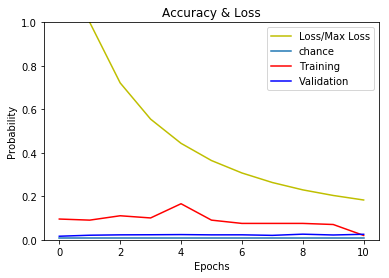

0.0270583


In [13]:
from image_classifier import ImageClassifier


model = ImageClassifier(picsize, lst_dogs,
                         out_channels = 24,
                         out_channels_2 = 48,
                         hidden_units = 128*6,
                         regularization_strength = 0.5,
                         batch_size = 200,
                         learning_rate = 0.001,
                         convolution_size = 5,
                         pool_size = 2,
                         training_epochs = 50,
                         loss_threshold = 5.0,
                         verbose=True)
model.fit(Xtrain, Ytrain)
plot_learning(model)
print(model.score(Xtest, Ytest))

Percent Complete: 18.0000% - Train Accuracy: 5.528% - Validation Accuracy: 3.250% - Loss Function: 40.1388--

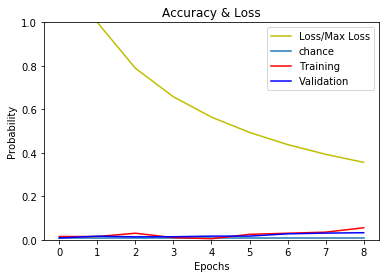

0.0295852


In [10]:
from image_classifier import ImageClassifier


model = ImageClassifier(picsize, lst_dogs,
                         out_channels = 24,
                         out_channels_2 = 48,
                         hidden_units = 200,
                         regularization_strength = 0.5,
                         batch_size = 200,
                         learning_rate = 0.001,
                         convolution_size = 5,
                         pool_size = 2,
                         training_epochs = 50,
                         loss_threshold = 5.0,
                         verbose=True)
model.fit(Xtrain, Ytrain)
plot_learning(model)
print(model.score(Xtest, Ytest))

Percent Complete: 20.0000% - Train Accuracy: 5.528% - Validation Accuracy: 2.290% - Loss Function: 41.44682-

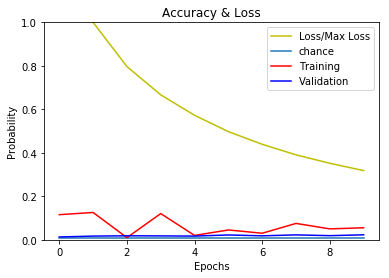

0.0267425


In [12]:
from image_classifier import ImageClassifier


model = ImageClassifier(picsize, lst_dogs,
                         out_channels = 24,
                         out_channels_2 = 48,
                         hidden_units = 240,
                         regularization_strength = 0.5,
                         batch_size = 200,
                         learning_rate = 0.001,
                         convolution_size = 5,
                         pool_size = 2,
                         training_epochs = 50,
                         loss_threshold = 5.0,
                         verbose=True)
model.fit(Xtrain, Ytrain)
plot_learning(model)
print(model.score(Xtest, Ytest))

Percent Complete: 18.0000% - Train Accuracy: 5.025% - Validation Accuracy: 2.182% - Loss Function: 37.53348-

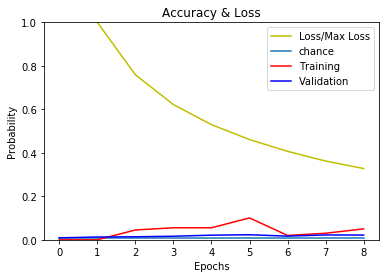

0.0194778


In [11]:
from image_classifier import ImageClassifier


model = ImageClassifier(picsize, lst_dogs,
                         out_channels = 24,
                         out_channels_2 = 48,
                         hidden_units = 300,
                         regularization_strength = 0.5,
                         batch_size = 200,
                         learning_rate = 0.001,
                         convolution_size = 5,
                         pool_size = 2,
                         training_epochs = 50,
                         loss_threshold = 5.0,
                         verbose=True)
model.fit(Xtrain, Ytrain)
plot_learning(model)
print(model.score(Xtest, Ytest))

Percent Complete: 14.0000% - Train Accuracy: 3.015% - Validation Accuracy: 1.470% - Loss Function: 39.7841--

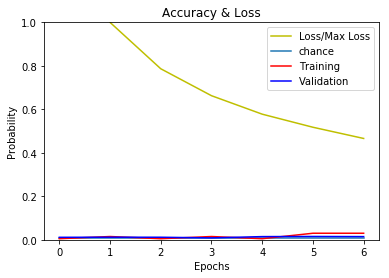

0.0246368


In [11]:
from image_classifier import ImageClassifier


model = ImageClassifier(picsize, lst_dogs,
                         out_channels = 24,
                         out_channels_2 = 48,
                         hidden_units = 100,
                         regularization_strength = 0.5,
                         batch_size = 200,
                         learning_rate = 0.001,
                         convolution_size = 5,
                         pool_size = 2,
                         training_epochs = 50,
                         loss_threshold = 5.0,
                         verbose=True)
model.fit(Xtrain, Ytrain)
plot_learning(model)
print(model.score(Xtest, Ytest))

Percent Complete: 24.0000% - Train Accuracy: 2.676% - Validation Accuracy: 1.377% - Loss Function: 54.79879-

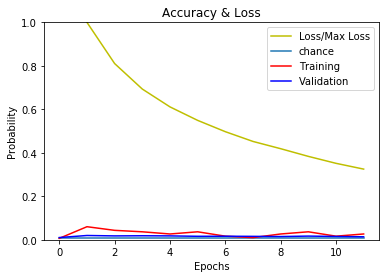

0.0186355


In [7]:
from image_classifier import ImageClassifier


model = ImageClassifier(picsize, lst_dogs,
                         out_channels = 24,
                         out_channels_2 = 48,
                         hidden_units = 100,
                         regularization_strength = 1.0,
                         batch_size = 300,
                         learning_rate = 0.001,
                         convolution_size = 5,
                         pool_size = 2,
                         training_epochs = 50,
                         loss_threshold = 5.0,
                         verbose=True)
model.fit(Xtrain, Ytrain)
plot_learning(model)
print(model.score(Xtest, Ytest))